In [1]:
import os
import sys
# Get the path to the current directory of the script
bins_path = "/Users/jzeng63/Desktop/CDNA/ML/HMM/TS/Bins"
sys.path.append(bins_path)

In [2]:
import pandas as pd
import numpy as np
from itertools import product
import random
import utility as utl
import matplotlib.pyplot as plt
import joblib
from pykalman import KalmanFilter
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score

In [3]:
# get data ['aval_AlloMap', 'aval_AlloSure', "ady_dna"]
X_train, X_test, y_train, y_test = utl._prepare_training(data_path = '../../../Data_processing/Outputs/train_2024.csv', features = ['aval_AlloMap', 'aval_AlloSure', "ady_dna"], exclusion = True, split = 0.8, patient_level = False)

In [4]:
# # Initialize the scaler
# scaler = StandardScaler()

# # Fit the scaler on the training data (only X_train)
# X_train = scaler.fit_transform(X_train)

# # Use the same scaler to transform the test data (use the same mean and std from X_train)
# X_test = scaler.transform(X_test)

In [5]:
# first_order 
# results = utl._find_init_parameters(X_train, X_test)

# second_order
results = utl._find_init_parameters_velocity(X_train, X_test, dt=1)

Residual Mean = -0.1395, Residual Std Dev = 82.0815, Covariance Diff = 0.0000, Combined Metric = 0.4251
Residual Mean = -0.1780, Residual Std Dev = 66.7187, Covariance Diff = 187218.2905, Combined Metric = 0.4578
Residual Mean = -0.0181, Residual Std Dev = 42.9923, Covariance Diff = 284789.4592, Combined Metric = 0.3427
Residual Mean = -0.0690, Residual Std Dev = 43.5130, Covariance Diff = 25330.8922, Combined Metric = 0.1226
Residual Mean = -0.0158, Residual Std Dev = 34.1603, Covariance Diff = 328666.1920, Combined Metric = 0.3064
Residual Mean = -0.0558, Residual Std Dev = 34.2742, Covariance Diff = 37564.6528, Combined Metric = 0.0555
Residual Mean = -0.1480, Residual Std Dev = 61.6051, Covariance Diff = 275920.9881, Combined Metric = 0.4916
Residual Mean = -0.1344, Residual Std Dev = 62.1901, Covariance Diff = 37593.1660, Combined Metric = 0.2903
Residual Mean = -14.4697, Residual Std Dev = 84.6851, Covariance Diff = 154969.0862, Combined Metric = 0.5811
Residual Mean = -14.4987, 

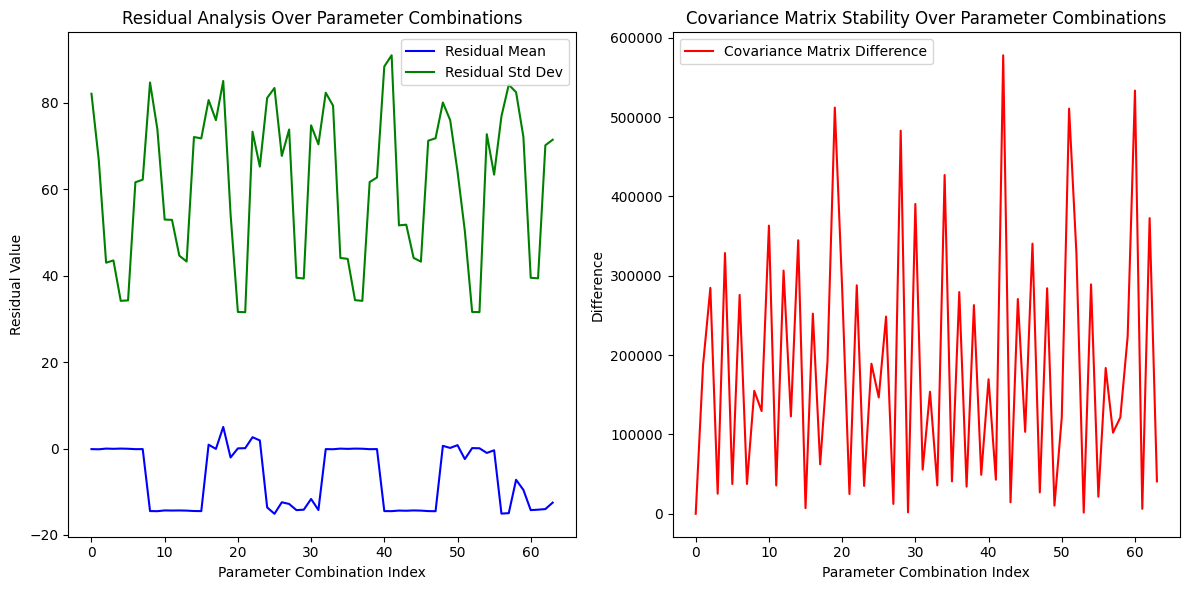

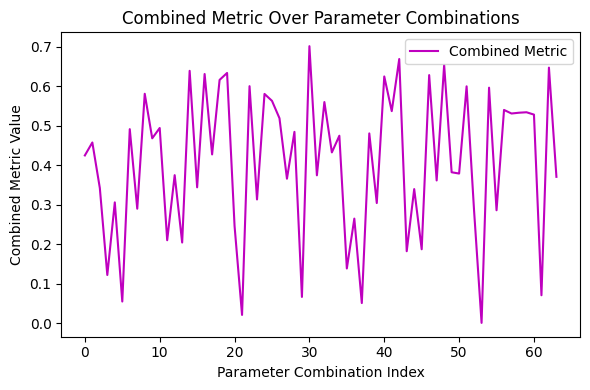

Best parameters saved to ../Outputs/80%train_50iter_commetrics_velocity_2024_No__partial__AS&AM_/best_parameters.json
All results saved to ../Outputs/80%train_50iter_commetrics_velocity_2024_No__partial__AS&AM_/all_results.csv
Plots saved to ../Outputs/80%train_50iter_commetrics_velocity_2024_No__partial__AS&AM_/residual_covariance_plots.png and ../Outputs/80%train_50iter_commetrics_velocity_2024_No__partial__AS&AM_/combined_metric_plot.png


In [6]:
import json 
# Create an output directory if it doesn't exist
train_split = "80%train_50iter_commetrics_velocity_2024"
output_dir = "../Outputs"
per_patient = "_No_" # _Yes_ vs _No_
full_data = "_partial_" # _full_ vs _partial
features = "_AS&AM_" # _AS_, _AM_ vs _AS&AM_ vs AM-noptd
utl._save_parameters(train_split, output_dir, per_patient, full_data, features, results)

# Fine-tuning

In [19]:
import json 
train_split = "80%train_50iter_commetrics_"
output_dir = "../Outputs"
per_patient = "_No_" # _Yes_ vs _No_
full_data = "_partial_" # _full_ vs _partial
features = "_AS&AM_" # _AS_, _AM_ vs _AS&AM_ vs AM-noptd

experiments_log = train_split + per_patient + full_data + features
path = os.path.join(output_dir, experiments_log)
best_params_file = os.path.join(path, "best_parameters.json")
# Function to read JSON file
def read_json_file(file_path):
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
        return data
    except FileNotFoundError:
        print(f"Error: The file at {file_path} was not found.")
    except json.JSONDecodeError:
        print("Error: The file could not be decoded. Ensure it's a valid JSON file.")

best_params = read_json_file(best_params_file)

Iteration 1: Residual Mean = 3.1430, Residual Std Dev = 52.8893
Iteration 2: Residual Mean = 2.8826, Residual Std Dev = 54.9436
Iteration 2: Covariance Matrix Difference = 192351.2738
Iteration 3: Residual Mean = 2.6467, Residual Std Dev = 55.8192
Iteration 3: Covariance Matrix Difference = 94350.6002
Iteration 4: Residual Mean = 2.4561, Residual Std Dev = 56.1016
Iteration 4: Covariance Matrix Difference = 44801.9603
Iteration 5: Residual Mean = 2.3045, Residual Std Dev = 56.1094
Iteration 5: Covariance Matrix Difference = 20705.1662
Iteration 6: Residual Mean = 2.1823, Residual Std Dev = 55.9988
Iteration 6: Covariance Matrix Difference = 9218.2418
Iteration 7: Residual Mean = 2.0820, Residual Std Dev = 55.8427
Iteration 7: Covariance Matrix Difference = 3804.5503
Iteration 8: Residual Mean = 1.9980, Residual Std Dev = 55.6740
Iteration 8: Covariance Matrix Difference = 1278.9604
Iteration 9: Residual Mean = 1.9265, Residual Std Dev = 55.5071
Iteration 9: Covariance Matrix Difference

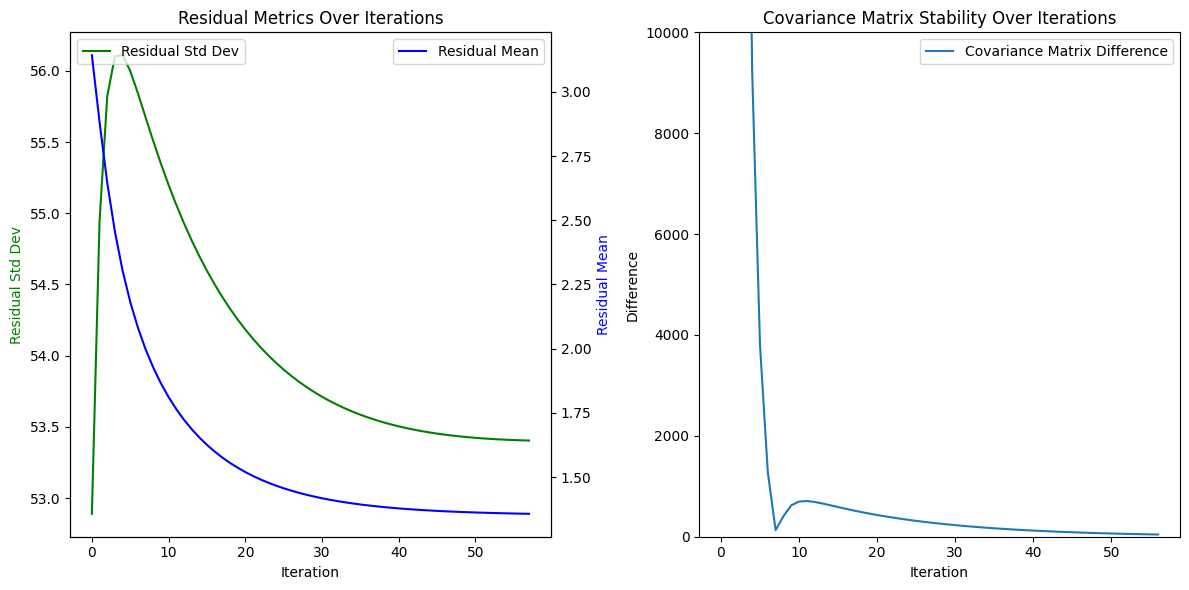

In [21]:
#['aval_AlloMap', 'aval_AlloSure', "ady_dna"]
full_data = "_full_" # _full_ vs _partial
X_train, X_test, y_train, y_test = utl._prepare_training(data_path = '../../../Data_processing/Outputs/train_2024.csv', features = ['aval_AlloMap', 'aval_AlloSure', "ady_dna"], exclusion = False, split = 0.8, patient_level = False)

kf = utl.fine_tuning(X_train, X_test, path, best_params, velocity = 1, iteration = 58)

In [22]:
import joblib
iteration = str(58)

experiments_log = train_split + per_patient + full_data + features
path = os.path.join(output_dir, experiments_log)

model_name = path.split("/")[-1] + iteration + ".pkl"

model_directory = "../models"
model_path = os.path.join(model_directory, model_name)
# Save the model to a file
joblib.dump(kf, model_path)

['../models/80%train_50iter_commetrics__No__full__AS&AM_58.pkl']

# Load Models

# Inference

In [26]:
X_train, X_test, y_train, y_test = utl._prepare_training(data_path = '../../../Data_processing/Outputs/train_2024.csv', features = ['aval_AlloMap', 'aval_AlloSure', "ady_dna"], exclusion = False, split = 0.8, patient_level = False)

# # Initialize the scaler
# scaler = StandardScaler()

# # Fit the scaler on the training data (only X_train)
# X_train = scaler.fit_transform(X_train)

# # Use the same scaler to transform the test data (use the same mean and std from X_train)
# X_test = scaler.transform(X_test)


utl._inference_with_future_steps(kf, X_test, X_train, y_test, y_train, features="AS", threshold= 0.5, n_future_steps=1, df=None, single = False)

,Threshold_0.5
Model_AUC,0.771476
Model_Accuracy,0.891745
Model_PPV,0.374150
Model_Sensitivity,0.488889
Model_Specificity,0.927473
Baseline_AUC,0.767046
Baseline_Accuracy,0.897176
Baseline_PPV,0.386973
Baseline_Sensitivity,0.448889
Baseline_Specificity,0.936933


# walkthrough different type of models

In [81]:
model_directory = "../models"
AS_noptd = "80%train_50iter_commetrics_velocity_No__full__AS_60.pkl"
AM_noptd = "80%train_50iter_commetrics_velocity_No__full__AM_60.pkl"
AS_AM_noptd = "80%train_50iter_commetrics_velocity_No__full__AS&AM_120.pkl"

models = {"AS_noptd":[AS_noptd, "AS", 0.5, ['aval_AlloSure', "ady_dna"]], "AM_noptd":[AM_noptd, "AM", 34, ['aval_AlloMap', "ady_dna"]], "AS_AM_noptd(*)":[AS_AM_noptd, "AS", 0.5, ['aval_AlloMap','aval_AlloSure', "ady_dna"]], "AS_AM_noptd":[AS_AM_noptd, "AS&AM", 0.5, ['aval_AlloMap','aval_AlloSure', "ady_dna"]]}

dfs = []
for model in models.keys():
    print (model)
    X_train, X_test, y_train, y_test = utl._prepare_training(data_path = '../../../Data_processing/Outputs/train.csv', features = models[model][3], exclusion = False, split = 0.8, patient_level = False)
    model_path = os.path.join(model_directory, models[model][0])
    kf = joblib.load(model_path)

    if model == "AS_AM_noptd" or model == "AS_AM_noptd(*)":
        single = False
    else:
        single = True
    
    df = utl._inference_with_future_steps(kf, X_test, X_train, y_test, y_train, features = models[model][1], threshold = models[model][2], n_future_steps=1, df=None, single = single)

    dfs.append(df)

AS_noptd
AM_noptd
AS_AM_noptd(*)
AS_AM_noptd


In [82]:
output_file = os.path.join(output_dir, "_including_pst_full_velocity.csv")
pd.concat(dfs, axis = 1).to_csv(output_file)

In [83]:
pd.concat(dfs, axis = 1)

,Threshold_0.5,Threshold_34,Threshold_0.5,Threshold_0.5
Model_AUC,0.728390,0.570554,0.735636,0.735636
Model_Accuracy,0.897826,0.784348,0.887391,0.865652
Model_PPV,0.381643,0.120098,0.340611,0.224215
Model_Sensitivity,0.424731,0.263441,0.419355,0.268817
Model_Specificity,0.939451,0.830180,0.928571,0.918165
Baseline_AUC,0.702114,0.572891,0.702114,0.702114
Baseline_Accuracy,0.898696,0.688261,0.898696,0.898696
Baseline_PPV,0.375661,0.117986,0.375661,0.375661
Baseline_Sensitivity,0.381720,0.440860,0.381720,0.381720
Baseline_Specificity,0.944182,0.710028,0.944182,0.944182


# Rebuild secondary layer

In [107]:
AS_AM_noptd = "80%train_50iter_commetrics_velocity_No__full__AS&AM_120.pkl"
model_path = os.path.join(model_directory,AS_AM_noptd)
kf = joblib.load(model_path)

In [109]:
X_train, X_test, y_train, y_test = utl._prepare_training(data_path = '../../../Data_processing/Outputs/train.csv', features = ['aval_AlloMap','aval_AlloSure', "ady_dna"], exclusion = False, split = 0.8, patient_level = False)
train_state, train_covariance = kf.filter(X_train)
test_state, test_covariance = kf.filter(X_test)

In [110]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
# Step 4: Logistic Regression model
# Define logistic regression with hyperparameter tuning (regularization)
logreg = LogisticRegression()

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data (only X_train)
train_state = scaler.fit_transform(train_state)

# Use the same scaler to transform the test data (use the same mean and std from X_train)
test_state = scaler.transform(test_state)

# Step 5: Set up hyperparameters to optimize (using grid search)
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear']}
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc')

# Step 6: Fit the model on training data and find the best parameters
grid_search.fit(train_state, y_train)
best_model = grid_search.best_estimator_

# Step 7: Predict on test set
y_pred = best_model.predict(test_state)
y_pred_proba = best_model.predict_proba(test_state)[:, 1]

# Step 8: Confusion Matrix to calculate specificity and sensitivity
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Step 9: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
ppv = precision_score(y_test, y_pred)  # Positive Predictive Value
sensitivity = recall_score(y_test, y_pred)  # Sensitivity (Recall)
specificity = tn / (tn + fp)  # Specificity (True Negative Rate)
auc = roc_auc_score(y_test, y_pred_proba)  # Area Under ROC Curve

# Step 10: Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"PPV (Precision): {ppv:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"AUC: {auc:.4f}")

Accuracy: 0.9200
PPV (Precision): 1.0000
Sensitivity (Recall): 0.0108
Specificity: 1.0000
AUC: 0.6938


# test_data_set 2024

In [14]:
AS_AM_noptd = "80%train_50iter_commetrics_velocity_No__full__AS&AM_120.pkl"
model_directory = "../models"
model_path = os.path.join(model_directory,AS_AM_noptd)
kf = joblib.load(model_path)

In [15]:
t2023 = pd.read_csv('../../../Data_processing/Outputs/train.csv')
t2024 = pd.read_csv('../../../Data_processing/Outputs/train_2024.csv')

In [16]:
# Rows in df2 but not in df1
test = t2024[~t2024["usubjid"].isin(t2023["usubjid"])].dropna()
X = test[['aval_AlloMap','aval_AlloSure', "ady_dna"]].values
y = test["label"].values

In [18]:
print (test["usubjid"].nunique())

264


In [19]:
print (test.value_counts("label"))

label
0.0    1451
1.0     103
Name: count, dtype: int64


In [21]:
utl._inference_with_future_steps(kf, X, X, y, y, features="AS", threshold=0.1, n_future_steps=1, df=None, single = False)

,Threshold_0.1
Model_AUC,0.750597
Model_Accuracy,0.404118
Model_PPV,0.091360
Model_Sensitivity,0.893204
Model_Specificity,0.369400
Baseline_AUC,0.749848
Baseline_Accuracy,0.660875
Baseline_PPV,0.131944
Baseline_Sensitivity,0.737864
Baseline_Specificity,0.655410


In [29]:
dfs = []
for cut in [0.1, 0.2, 0.3, 0.4, 0.5]:    
    df = utl._inference_with_future_steps(kf, X, X, y, y, features="AS", threshold=cut, n_future_steps=1, df=None, single = False)

    dfs.append(df)

In [25]:
output_dir = "../Outputs"
output_file = os.path.join(output_dir, "test_on_dateset_2024_velocity.csv")
pd.concat(dfs, axis = 1).to_csv(output_file)

In [28]:
pd.concat(dfs, axis = 1)

,Threshold_0.1,Threshold_0.2,Threshold_0.3,Threshold_0.4,Threshold_0.5
Model_AUC,0.750597,0.750597,0.750597,0.750597,0.750597
Model_Accuracy,0.826255,0.826255,0.826255,0.826255,0.826255
Model_PPV,0.135371,0.135371,0.135371,0.135371,0.135371
Model_Sensitivity,0.300971,0.300971,0.300971,0.300971,0.300971
Model_Specificity,0.863542,0.863542,0.863542,0.863542,0.863542
Baseline_AUC,0.749848,0.749848,0.749848,0.749848,0.749848
Baseline_Accuracy,0.660875,0.776705,0.829472,0.853925,0.867439
Baseline_PPV,0.131944,0.164835,0.200000,0.218182,0.221622
Baseline_Sensitivity,0.737864,0.582524,0.524272,0.466019,0.398058
Baseline_Specificity,0.655410,0.790489,0.851137,0.881461,0.900758
